<a href="https://colab.research.google.com/github/kameshcodes/deep-learning-codes/blob/main/transfer_learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

# Transforms

In [3]:
from google.colab import files
uploaded = files.upload()

Saving photo7.jpg to photo7.jpg


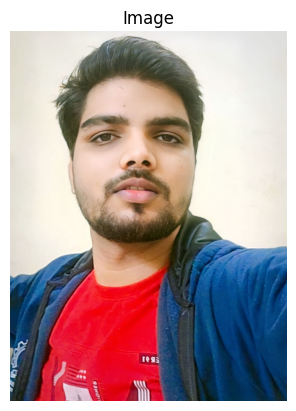

In [4]:
img = Image.open("/content/photo7.jpg")
plt.imshow(img)
plt.axis('off')
plt.title('Image')
plt.show()

In [5]:
my_transforms = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            [0.485, 0.456, 0.406],
            [0.229, 0.224, 0.225]
        )
    ]
)

In [6]:
transformed_image = my_transforms(img)

In [7]:
transformed_image

tensor([[[ 1.9064,  1.9064,  1.9064,  ...,  1.9064,  1.9064,  1.8893],
         [ 1.9064,  1.9064,  1.9064,  ...,  1.9064,  1.9064,  1.8893],
         [ 1.9064,  1.9064,  1.9064,  ...,  1.9064,  1.9064,  1.9064],
         ...,
         [-1.7754, -1.5528, -1.4500,  ..., -1.9980, -1.9295, -1.9467],
         [-1.7925, -1.6898, -1.5870,  ..., -2.0152, -1.9980, -2.0494],
         [-1.7925, -1.6727, -1.5357,  ..., -2.0323, -2.0323, -2.0494]],

        [[ 1.9734,  1.9734,  1.9734,  ...,  2.0959,  2.0959,  2.0784],
         [ 1.9734,  1.9734,  1.9734,  ...,  2.0959,  2.0959,  2.0784],
         [ 1.9734,  1.9734,  1.9734,  ...,  2.0959,  2.0959,  2.0959],
         ...,
         [-0.9853, -0.8978, -0.8978,  ..., -0.7402, -0.6702, -0.7227],
         [-1.0553, -1.0553, -1.0378,  ..., -0.7752, -0.7752, -0.7752],
         [-1.0903, -1.0728, -1.0203,  ..., -0.8102, -0.8102, -0.7927]],

        [[ 1.9777,  1.9777,  1.9777,  ...,  2.2217,  2.2217,  2.2043],
         [ 1.9777,  1.9777,  1.9777,  ...,  2

In [8]:
transformed_image.numpy().shape

(3, 224, 224)

In [9]:
transformed_image.size()

torch.Size([3, 224, 224])

In [10]:
transformed_image.permute(1,2,0).numpy().shape

(224, 224, 3)

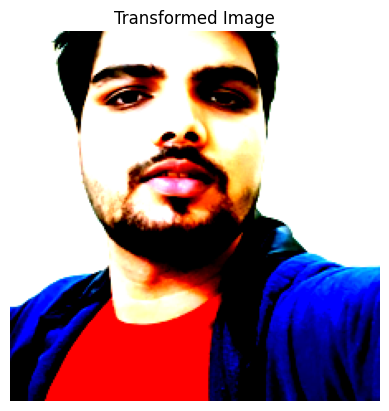

In [11]:
unnormalized_image = torch.clamp(transformed_image, 0, 1)
plt.imshow(transformed_image.permute(1,2,0).numpy())
plt.axis('off')
plt.title('Transformed Image')
plt.show()

### Restoring back image

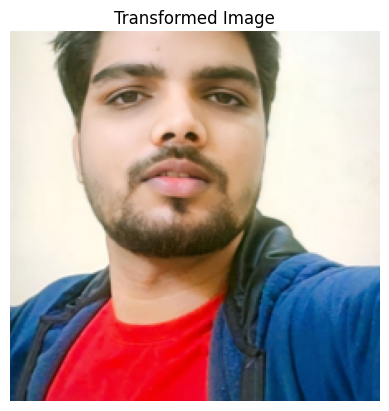

In [12]:
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])
unnormalized_image = transformed_image * std[:, None, None] + mean[:, None, None]
unnormalized_image = torch.clamp(unnormalized_image, 0, 1)

plt.imshow(unnormalized_image.permute(1,2,0).numpy())
plt.axis('off')
plt.title('Transformed Image')
plt.show()

# Working With Kaggle Data For Transfer Learning

## 1. Downloading Dataset

In [13]:
! pip install -q kaggle

In [14]:
uploaded = files.upload()

Saving kaggle-secret.json to kaggle-secret.json


In [15]:
!mkdir -p ~/.kaggle
!cp kaggle-secret.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle-secret.json

In [16]:
dataset_name = 'pmigdal/alien-vs-predator-images' #choose an image dataset from kaggle and change dataset name here
!kaggle datasets download -d {dataset_name}

Dataset URL: https://www.kaggle.com/datasets/pmigdal/alien-vs-predator-images
License(s): ODbL-1.0
 50% 7.00M/14.1M [00:00<00:00, 65.5MB/s]
100% 14.1M/14.1M [00:00<00:00, 102MB/s] 


In [17]:
import os
import zipfile
#extract the zipfile
zip_file_path = f'{dataset_name.split("/")[-1]}.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('.')

# Delete the zipfile
os.remove(zip_file_path)
print(f"Deleted the ZIP file: {zip_file_path}")

Deleted the ZIP file: alien-vs-predator-images.zip


## 2. DataLoader

In [18]:
transforms = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

In [19]:
train_set = datasets.ImageFolder("./data/train",transforms)
val_set   = datasets.ImageFolder("./data/train",transforms)

In [36]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=8,
                                       shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=8,
                                       shuffle=True, num_workers=2)

In [37]:
classes = train_set.classes
classes

['alien', 'predator']

In [38]:
device = torch.device("cuda:0" if torch.cuda.is_available()
                               else "cpu")

In [39]:
import torch
import torchvision.models as models

In [40]:
model = models.resnet34(weights=True)

In [41]:
next(model.parameters())[0][0]

tensor([[ 0.0054, -0.0069,  0.0079,  0.0379,  0.0491,  0.0307,  0.0254],
        [ 0.0411,  0.0313,  0.0323,  0.0271,  0.0331,  0.0298,  0.0417],
        [ 0.0050, -0.0317, -0.0613, -0.0906, -0.0975, -0.1160, -0.1219],
        [-0.0558, -0.1095, -0.1144, -0.1208, -0.1477, -0.1896, -0.1698],
        [-0.0123, -0.0248, -0.0093,  0.0116,  0.0171,  0.0025,  0.0167],
        [ 0.0039,  0.0045,  0.0363,  0.0849,  0.1037,  0.0740,  0.0591],
        [ 0.0168,  0.0089,  0.0313,  0.0747,  0.0970,  0.0837,  0.0970]],
       grad_fn=<SelectBackward0>)

In [42]:
for param in model.parameters():
  param.requires_grad = False

We have set `requires_grad = False` so that we can use the pre-trained model as a feature extractor

In [43]:
model.fc.in_features

512

In [44]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [45]:
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    average_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch + 1}], Average Loss: {average_loss:.4f}')
print('Finished Training')

Epoch [1], Average Loss: 0.5388
Epoch [2], Average Loss: 0.3410
Epoch [3], Average Loss: 0.3051
Epoch [4], Average Loss: 0.2594
Epoch [5], Average Loss: 0.2876
Epoch [6], Average Loss: 0.2439
Epoch [7], Average Loss: 0.2283
Epoch [8], Average Loss: 0.2064
Epoch [9], Average Loss: 0.2281
Epoch [10], Average Loss: 0.2067
Epoch [11], Average Loss: 0.2245
Epoch [12], Average Loss: 0.1917
Epoch [13], Average Loss: 0.2114
Epoch [14], Average Loss: 0.1875
Epoch [15], Average Loss: 0.1711
Epoch [16], Average Loss: 0.2287
Epoch [17], Average Loss: 0.1768
Epoch [18], Average Loss: 0.1873
Epoch [19], Average Loss: 0.2014
Epoch [20], Average Loss: 0.1754
Epoch [21], Average Loss: 0.1799
Epoch [22], Average Loss: 0.1850
Epoch [23], Average Loss: 0.1679
Epoch [24], Average Loss: 0.1528
Epoch [25], Average Loss: 0.1832
Epoch [26], Average Loss: 0.1582
Epoch [27], Average Loss: 0.1366
Epoch [28], Average Loss: 0.1759
Epoch [29], Average Loss: 0.1623
Epoch [30], Average Loss: 0.1558
Epoch [31], Average

In [46]:
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(2):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
for i in range(2):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of alien : 96 %
Accuracy of predator : 96 %


In [80]:
def predict_image(image_path, model):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Image')
    plt.show()
    image_tensor = transforms(image)
    image_tensor = image_tensor.unsqueeze(0)
    image_tensor = image_tensor.to(device)
    output = model(image_tensor)
    index = output.argmax().item()
    print('\n\nPrediction: ', end="")
    if index == 0:
        return "Image has alien"
    elif index == 1:
        return "Image has a predator"
    else:
        return

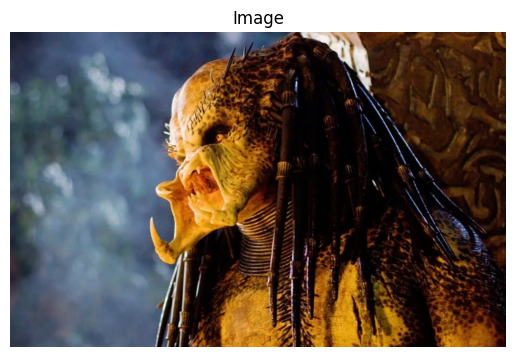



Prediction: Image has a predator


In [81]:
model.eval()
image_name = '/content/predator-1.jpg'
print(predict_image(image_name,model))

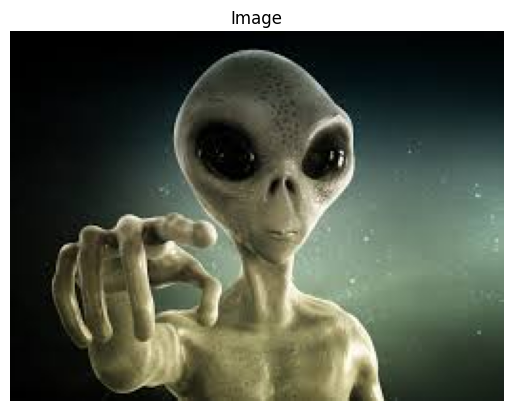



Prediction: Image has alien


In [82]:
image_name = '/content/alien-1.jpeg'
print(predict_image(image_name,model))

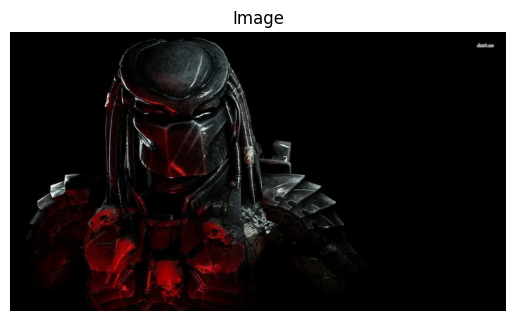



Prediction: Image has a predator


In [83]:
image_name = '/content/predator-2.jpg'
print(predict_image(image_name,model))

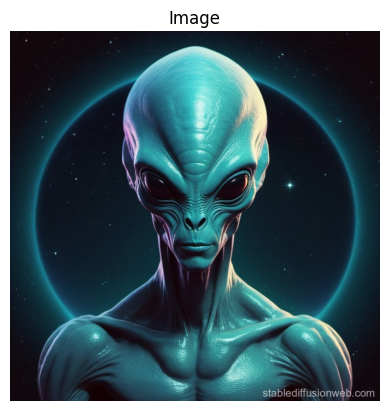



Prediction: Image has alien


In [84]:
image_name = '/content/alien-2.jpg'
print(predict_image(image_name,model))